### NLP
### Assignment 1

### 1. Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request

#### Helper custom fuctions


In [2]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue

                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path,encoding='utf-8') as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

#### Donwload the data from the following link and read the data from the file.

In [3]:
# Dowload the data from the source

helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)

helper.download_dataset()
df = helper.read_dataset('dataset')
df.head()


,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


### 2. Data Analysis

In [4]:
df['label'].value_counts()


0    27256
1     1387
Name: label, dtype: int64

In [5]:
# check for missing values

df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

352

In [7]:
# check for the distribution of the labels
df['label'].value_counts()

0    27256
1     1387
Name: label, dtype: int64

In [8]:
# check for all the special characters
df['text'].str.extractall(r'([^a-zA-Z\s])')[0].value_counts()


.    27248
,    16314
'     7006
!     6092
?     3846
     ...  
μ        1
ύ        1
ď        1
ז        1
ú        1
Name: 0, Length: 257, dtype: int64

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.head()



,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18
2,But it's ok....because Europe will soon rebel ...,1,24,132,6,0,3,98,14,21
3,I forsee a big civil war in Europe in the futu...,0,18,94,2,0,3,71,8,16
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,8,55,1,0,10,35,1,8


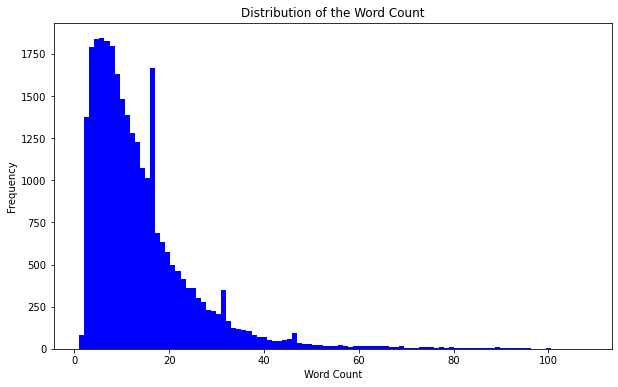

In [10]:
# Plot the distribution of the word count

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

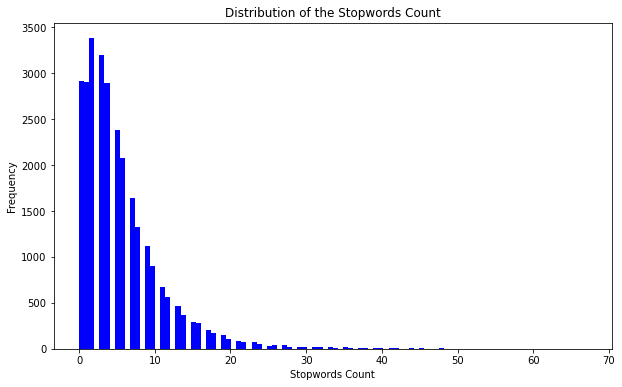

In [11]:
# Plot the distribution of the stopword count
# Plot the distribution of the stopword count
plt.figure(figsize=(10, 6))
plt.hist(df['stopwords_count'], bins=100, color='blue')
plt.title('Distribution of the Stopwords Count')
plt.xlabel('Stopwords Count')
plt.ylabel('Frequency')
plt.show()

### 3. Perform Clean up and data analysis

In [12]:
import nltk
from nltk.tokenize import sent_tokenize
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

from wordcloud import WordCloud

In [13]:
#sentence tokinization

#this cell is just to understand how sent_token works

df['sent_token']=df.text.apply(sent_tokenize)

In [14]:
df.iloc[2]['text']

"But it's ok....because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed.\n"

In [15]:
df[df.sent_token.str.len()>4]

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token
8730,SO DONT GET YOUR HOPES TOO HIGH !!!!!YOU GONNA...,0,35,213,30,0,131,17,0,34,"[SO DONT GET YOUR HOPES TOO HIGH !!!!, !YOU GO..."
10482,yea my bro!!!!RUSSIA IS THE BEST!!!!LONG LIVE ...,0,20,172,38,0,106,8,1,19,"[yea my bro!!!, !RUSSIA IS THE BEST!!!, !LONG ..."
10512,I agre my bro!!!!FUCK THE ISLAM!!!!!Greetings ...,1,29,250,55,0,89,77,8,26,"[I agre my bro!!!, !FUCK THE ISLAM!!!!, !Greet..."
10517,"and i well fuck you with big,biger and bigest ...",0,27,224,36,0,93,68,7,25,"[and i well fuck you with big,biger and bigest..."
10520,SERBIA suportetd you my BRO!!!!!!!!KILL MUSLIM...,1,10,109,36,0,49,14,2,10,"[SERBIA suportetd you my BRO!!!!!!!, !KILL MUS..."
10586,FUCK YOU MOTHERFUCKER!!!!!!!WEE WEELL KILL YOU...,1,20,161,31,0,110,0,0,16,"[FUCK YOU MOTHERFUCKER!!!!!!, !WEE WEELL KILL ..."
19126,"u see, i dont understand why ppl like to make ...",0,38,195,20,0,0,133,9,34,"[u see, i dont understand why ppl like to make..."


In [16]:
#removing other non alphabetic words 

df['word_english_aplha']=df['text'].replace('[^\w\s]','')

# this cell explains how the regex or methods are not effective on the removal of arabic letters

In [17]:
df[df['word_english_aplha'].str.contains('ٱلس')]

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token,word_english_aplha
17247,وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِنّ...,0,5,62,0,0,0,0,0,5,[وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِن...,وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِنّ...


#this handles special charcter and space issues --> this needs to added inisde a function

df['text'] = df['text'].apply(lambda x: re.sub('\n','',x))
#removing unwanted characters.
# not using ,. because it might lead to joining to words if there is no space
df['text'] = df['text'].apply(lambda x: ''.join([y.lower() for y in x if y.isalpha() or y in " ,.'"]))
#remove the . and , and make sure there is a space in between
df['text'] = df['text'].apply(lambda x: re.sub(r'[\,\.\']',' ',x))

In [18]:
    #initializing the stop words present in NLTK lib
    stop_words=stopwords.words('english')
    #adding few stopwords using extend method
    addd=[ 'd','ll', 'm', 'o', 're', 've', 'y', 'ma','even','ur','u']
   
    #set is used to remove the stopwords easily
    stop_words=set(stop_words)
    # after doing research on the stopwords, we are  modifying the stopwords to avoid deleting the negations
    remov_list=["wouldn't","wouldn","won't","won","weren't","weren","wasn't","wasn","shouldn't","shouldn","shan't","shan","needn't","needn","mustn't","mustn","mightn't","mightn","isn't","isn","haven't","haven","hasn't","hasn","hadn't","hadn","doesn't","didn't","didn","couldn't","couldn","aren't","aren","ain","don't","don","not","no","nor"]
    for words in remov_list:
        stop_words.discard(words)
    for words in addd:
        stop_words.add(words)

In [19]:
text="But it's ok....because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed.\n"

In [20]:
text=re.sub(r'[^\w\s,]', ' ', text)

In [21]:
text =re.sub(r'\n','',text)

In [22]:
text = re.sub(r'\d+', '', text)

In [23]:
text

'But it s ok    because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed '

In [24]:
text=re.sub(r'\s{2,}', ' ', text)

In [25]:
text

'But it s ok because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed '

In [26]:
def clean_column(dataframe):

    """
    arg: passing the text column
    
    function: check for non-alpha values using ascii method, remove digits, remove punctuation, special characters,
    word tokenization,stopword removal and unwanted white space
    
    return: new column named cleaned_v_1
    """
    #making sure we are just passing the right column onlu
    comment= dataframe.text
    # removing no alpha values
    comment = re.sub(r'[^\w\s,]', ' ', comment)
    #removing new line character 
    comment = re.sub(r'\n','',comment)
        #removing unwanted characters.
    # not using ,. because it might lead to joining to words if there is no space
    comment=''.join([y.lower() for y in comment if y.isalpha() or y in " ,.'"])
    #removing . , / and other special character
    comment= re.sub(r'[\,\.\']',' ',comment)
    # digits and non- ascii value removal --> as our text contains non-english words
    comment = re.sub(r'\d+', '', comment)
    comment = ''.join(letter for letter in comment if ord(letter) < 128)
    # punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    #extra white spaces are found, revoming that
    comment = re.sub(r'\s{2,}', ' ', comment)

    token = word_tokenize(comment.lower())
    
    token = [word for word in token if word not in stop_words]
    token=" ".join(token)
    
    if not token:
      return np.NaN #creating nan values for the empty string length
    return token

df['cleaned_v_1'] = df.apply(clean_column, axis=1)

In [27]:
def token_(text):
    """
    arg: passing the cleaned_v_1 column
    
    function: creating a word_token column with empty list for nan values
    
    return: new column named word_tokens
    """
    #checking for text cell only
    if isinstance(text,str): 
        word_tok=word_tokenize(text.lower())
        return(word_tok)
    #for empty cell
    else:
        return([])

df['word_tokens']=df['cleaned_v_1'].apply(token_)

In [28]:
#chekcing the non-english word removal

df.iloc[17247]['cleaned_v_1']

nan

In [29]:
#applying lemma (verb)
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem.lemmatize('dove',pos = 'v')

'dive'

### experiment 1 --> lemma --> verb

In [44]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def lemma_(words,tag):
    """
    arg: tokenized words from the word_token column
    
    function: applying text normalization technique on the words to get the base form of the word 
    
    return: word list in base form
    """
    word= [lem.lemmatize(word,tag) for word in words]
    print(word)
    return word





def lemm_method(tag):
    column_name="word_tokens_{}".format(tag)
    df[column_name] =df['word_tokens'].apply(lambda x: lemma_(x,tag))
lemm_method('a') #pass any pos like v--> verb,n --> noun,a --> adjective,r --> adverb

['european', 'not', 'want', 'change', 'way', 'life', 'custom', 'make', 'european']
['muslim', 'not', 'want', 'assimilate', 'properly', 'european', 'society', 'call', 'sharia', 'law']
['ok', 'europe', 'soon', 'rebel', 'like', 'spain', 'drive', 'killed']
['forsee', 'big', 'civil', 'war', 'europe', 'future', 'muslim', 'not', 'leave', 'quietly']
['islam', 'simple', 'humanitarian', 'attractive', 'religion']
['welcome', 'islam']
['please', 'read', 'quran']
['islam', 'power', 'peacefully', 'conquering', 'soul', 'simplicity', 'theology', 'clearness', 'dogma', 'principle', 'definite', 'number', 'practice', 'demand']
['contrast', 'christianity', 'undergoing', 'continual', 'transformation', 'since', 'origin', 'islam', 'remained', 'identical']
['jean', 'l', 'heureux', 'etude', 'sur', 'l', 'islamisme', 'p']
['islam', 'overtaken', 'roman', 'catholicism', 'biggest', 'single', 'religious', 'denomination', 'world', 'according', 'new', 'figure']
['newly', 'released', 'yearbook', 'statistic', 'vatican', 

['people', 'fucking', 'idiot']
['sariah', 'law', 'doesnt', 'mean', 'beheading', 'people', 'cunt']
['syariah', 'law', 'im', 'country', 'dont', 'behead', 'nor', 'stone', 'people', 'death']
['dont', 'ignorant']
['iv', 'studied', 'quran', 'want', 'quote', 'thing', 'kill', 'unbeliever', 'show', 'jordan', 'honor', 'killing', 'know', 'dumb', 'fuck']
['child', 'leaf', 'reliigion', 'say', 'doughter', 'boyfriend', 'isnt', 'virgin', 'cut', 'head', 'kill', 'iran', 'hang', 'faggot', 'street', 'dont', 'give', 'bull', 'shit', 'allah', 'say', 'self', 'he', 'ultimate', 'deceiver', 'liar', 'muhammad', 'sex', 'year', 'old', 'said', 'gift', 'allah']
['oh', 'studied', 'quran']
['fact', 'wrong']
['let', 'say', 'according', 'history', 'christian']
['ku', 'klax', 'klan', 'extremist', 'christian']
['say', 'christian', 'terrorist']
['course', 'not', 'another', 'act', 'crime', 'reflect', 'whole', 'religion']
['history']
['common', 'era', 'bad', 'people', 'killed', 'jew', 'muslim']
['world', 'war', 'hitler', 'chr

['piece', 'body', 'piece', 'brain', 'piece', 'leg']
['obviously', 'thinking', 'every', 'single', 'muslim', 'would', 'live', 'condition', 'like']
['every', 'muslim', 'know', 'family', 'friend', 'etc', 'kind', 'people', 'man', 'respect', 'woman', 'like', 'western', 'people']
['hell', 'would', 'think', 'would', 'defend', 'religion', 'knew', 'piece', 'shit']
['yes', 'people', 'extremist', 'hated', 'th', 'muslim', 'seen', 'bad', 'part', 'islam', 'please', 'open', 'eye', 'stop', 'believin', 'medium']
['fat', 'american', 'arent']
['hope', 'iran', 'russia', 'get', 'together', 'bomb', 'shit', 'piece', 'shit']
['thats', 'fat', 'virgin', 'deserve']
['thin', 'american', 'ar', 'looking', 'hang', 'muslime', 'scalp', 'belt']
['pathetic', 'pedophile', 'worshiper']
['go', 'fuck', 'another', 'goat']
['yeah', 'im', 'pedophile', 'parent', 'age', 'gf', 'whats', 'left']
['allowed', 'watch', 'father', 'fuck', 'girlfriend']
['jerk', 'closet', 'goat']
['muslimes', 'believed', 'lie', 'spread', 'filthy', 'religi

['unfortunately', 'many', 'crazy', 'islamic', 'nazi', 'fascist', 'live', 'england', 'probably', 'one']
['btw', 'child', 'half', 'dutch', 'dutch', 'father', 'born', 'het', 'eudokia', 'ziekenhuis', 'rotterdam']
['know', 'dutch', 'people', 'racist', 'told', 'go', 'back', 'country', 'speak', 'dutch', 'accent']
['return', 'country', 'glad', 'judging', 'stinking', 'attitude']
['still', 'many', 'friend', 'lost', 'dutch', 'charm']
['like', 'middle', 'east', 'really', 'didn', 'see', 'many', 'blond', 'dutch', 'people']
['derka', 'derka', 'let', 'see', 'go', 'blow', 'suicide', 'attack']
['no', 'miracle', 'performed', 'piggy', 'boy', 'mohammed', 'human', 'filth', 'keep', 'following', 'false', 'prophet', 'moron']
['straight', 'hell']
['reminded', 'egg', 'carton']
['muslim', 'love', 'make', 'race']
['islam', 'not', 'race']
['religion']
['ergo', 'no', 'problem', 'arab', 'egyptions', 'algierians', 'pakistani', 'etc', 'etc']
['problem', 'muslim', 'jihadist', 'called', 'religion']
['terrorism', 'bible',

['judish', 'ppl', 'look', 'like', 'ape', 'cu', 'said', 'mohammed', 'would', 'said', 'kill', 'who', 'not', 'muslim', 'war', 'right', 'instead', 'peache']
['say', 'respect', 'believing', 'dont', 'respect']
['hard', 'anyway']
['cant', 'typ', 'im', 'text', 'ty']
['asshole', 'similar', 'insane', 'norwegian', 'guy', 'anti', 'islam', 'pro', 'israel', 'careful', 'might', 'kill', 'young', 'dutch', 'people']
['one', 'pig']
['muslim', 'try', 'point', 'oslo', 'bombing']
['guy', 'deranged', 'like', 'ted', 'bundy', 'charles', 'manson', 'probably', 'psychiatric', 'drug', 'attacked', 'race', 'people', 'politics', 'nothing']
['muslim', 'attack', 'european', 'others', 'based', 'pure', 'ideology', 'backed', 'foreign', 'muslim', 'state', 'conspiring', 'group']
['never', 'get', 'complacent', 'islamic', 'threat']
['still', 'must', 'deport', 'use', 'suitcase', 'nuclear', 'bomb']
['anders', 'breivik', 'greet', 'wilder', 'hero', 'taking', 'step', 'stop', 'islamization', 'europe']
['stand', 'muslim', 'coming', 

['see', 'little', 'integrity', 'accepted', 'right', 'choose', 'become', 'muslim', 'given', 'islam', 'support', 'denial', 'right', 'inflicted', 'vast', 'majority', 'born', 'ummah', 'no', 'problem', 'murder', 'non', 'belief']
['god', 'thank', 'lol', 'know', 'not', 'shred', 'proof', 'one', 'creationism']
['obviously', 'didnt', 'research', 'think', 'accept', 'error', 'era', 'koran', 'prof', 'hoax', 'islam']
['tell', 'miss', 'know']
['denial', 'ignorant', 'miss', 'judge', 'don']
['not', 'support', 'violence', 'none', 'believer']
['come', 'put', 'word', 'mouth', 'mouth', 'muslim']
['know', 'islam']
['relation']
['muslim', 'used', 'much', 'religous', 'realied', 'great', 'u']
['know', 'plenty', 'muslim', 'eren', 'terrorist', 'may', 'dissagree', 'thing', 'goverment', 'aren', 'terrorist']
['athiest', 'no', 'offense', 'study', 'anythime', 'athiest', 'gotten', 'power', 'misery', 'death', 'followed']
['one', 'single', 'terrorist', 'religion', 'world', 'evil', 'islam']
['no', 'religion', 'compare']


['case', 'say', 'atheist']
['human', 'would', 'still', 'arbitrary']
['think', 'moral', 'force', 'people', 'stop', 'applying', 'religious', 'view', 'medical', 'ethic']
['kind', 'arbitrary', 'morality', 'people', 'rightly', 'fear']
['religion', 'probably', 'better', 'society', 'way', 'view']
['well', 'not', 'god', 'something', 'else']
['yes', 'called', 'reason']
['secondly', 'christianity', 'history', 'major', 'compromise', 'fail', 'empirically', 'historically']
['crusade', 'fascism', 'let', 'not', 'forget', 'originated', 'right', 'wing', 'catholic', 'church', 'signed', 'concordat', 'mussolini', 'hitler', 'inquisition', 'salem', 'witch', 'trial', 'northern', 'ireland', 'year', 'war', 'new', 'anti', 'gay', 'law', 'uganda']
['none', 'demonstrates', 'falsity', 'empirical', 'fact', 'christianity', 'long', 'history', 'compromise']
['get', 'argument']
['way', 'still', 'waiting', 'supply', 'empirical', 'evidence', 'bomber', 'fundamentalist', 'muslim']
['muslim', 'not', 'thing', 'could', 'politi

['one', 'really', 'know', 'islam', 'never', 'change', 'religion']
['true', 'muslim', 'prostrates', 'god', 'creator', 'universe', 'never', 'accepts', 'another', 'god', 'creature', 'stupid', 'atheist', 'nobel', 'prize']
['dude', 'let', 'say', 'way', 'islam', 'truth', 'islam', 'peace', 'love', 'respect', 'love', 'allah', 'quit', 'fact']
['killed', 'million', 'people', 'week']
['oups', 'wasnt', 'muslim']
['america', 'calling', 'u', 'terrorist']
['muslim', 'done']
['kiling', 'philastine', 'people']
['kiling', 'ppl', 'afghanistan']
['muslim']
['oups', 'not']
['love', 'allah', 'love', 'islam', 'love', 'life', 'peace']
['ha', 'ha', 'ha', 'ha', 'get', 'better']
['pray', 'tell', 'allah', 'knowing', 'creator', 'everything', 'bother', 'make', 'human', 'not', 'hear', 'see']
['sound', 'like', 'incompetent', 'as', 'hole', 'blunder', 'creation', 'threatening', 'burn', 'people', 'ever', 'fuck', 'ups']
['sick', 'fucker', 'allah', 'make', 'human', 'not', 'believe', 'burn', 'rest', 'eternity']
['say', 'ge

['arranged', 'marriage', 'not', 'part', 'islam', 'strict', 'rule', 'ask', 'girl', 'want', 'not', 'forced', 'parent', 'sinning', 'punished', 'god']
['don', 'know', 'islam']
['true', 'hadith', 'give', 'detail', 'muhammed', 'ordered', 'death', 'apostate', 'quran', 'also', 'say']
['wish', 'ye', 'reject', 'faith', 'thus', 'footing', 'take', 'not', 'friend', 'rank', 'flee', 'way', 'allah', 'forbidden']
['turn', 'renegade', 'seize', 'slay', 'wherever', 'find', 'case', 'take', 'no', 'friend', 'helper', 'rank']
['quran', 'tell', 'muslim', 'testimony', 'woman', 'worth', 'half', 'man']
['search', 'anglo', 'saxon', 'mission', 'interview', 'transcript', 'london', 'insider', 'expose', 'white', 'people', 'evil', 'plan', 'muslim', 'asian']
['white', 'war', 'coming', 'soon']
['release', 'virus', 'create', 'famine']
['white', 'people', 'making', 'war', 'muslim', 'saint', 'humanity']
['whole', 'world', 'know', 'white', 'people', 'beast', 'prophecy']
['devour', 'everything', 'spirit', 'god', 'not', 'thus'

['spirituality', 'everyone']
['piece', 'want']
['may', 'not', 'literal', 'violent', 'rape', 'today', 'standard', 'would', 'considered', 'statutory', 'rape']
['guy', 'wife', 'nine', 'year', 'old']
['fact']
['entitled', 'opinion', 'not', 'fact']
['sure', 'commit', 'intellectual', 'sabotage', 'not', 'read', 'acknowledge', 'said', 'irrational', 'fear', 'burn', 'hell', 'questioning', 'faith']
['sure', 'islam', 'mean', 'submission', 'arabic', 'hear', 'say', 'part']
['ayaan', 'muslim', 'muslim', 'not', 'sure', 'really', 'sure', 'don', 'really', 'know', 'islam', 'common', 'sense', 'tell', 'u', 'don', 'comment', 'thing', 'no', 'knowledge']
['agree', 'admire', 'fact', 'take', 'stand', 'personal', 'belief', 'like', 'said', 'absence', 'solid', 'real', 'muslim', 'education', 'led', 'read', 'book']
['ayaan', 'hirsi', 'ali', 'hero', 'everyone', 'read', 'book']
['rarely', 'person', 'able', 'break', 'deep', 'dark', 'oppression', 'fundamentalist', 'islam', 'arabic', 'submission']
['quran', 'must', 'not'

['not', 'put', 'people', 'like', 'fox', 'spread', 'propaganda', 'little', 'peacefully']
['commenter', 'intelligent']
['read', 'everyone', 'opinion', 'trying', 'start', 'argument', 'hate']
['need', 'somebody', 'like']
['many', 'educated', 'people', 'never', 'think', 'way']
['god', 'bless']
['killing', 'innocent', 'people']
['islam', 'worst', 'worst']
['simply', 'garbage', 'religion']
['muslim', 'live', 'believe', 'people', 'cool', 'shit']
['lot', 'friend', 'wish', 'good', 'life']
['don', 'let', 'fool', 'ya', 'try', 'rearrange', 'ya', 'peace']
['first', 'muslim', 'proud', 'religion', 'simply', 'right', 'peaceful']
['second', 'don', 'know', 'people', 'live', 'planet', 'live', 'haven', 'heard', 'news', 'anywhere', 'thing', 'many', 'place', 'world']
['killing', 'million', 'iraqi', 'afghani', 'palestinian', 'etc', 'muslim', 'no', 'reason', 'nobody', 'saying', 'anything']
['commenter', 'assalamualaikum', 'people', 'ira', 'bombing', 'blame', 'religion', 'cristian', 'action']
['muslim', 'bad', 

['call', 'opportunistic', 'bitch', 'say', 'nelson', 'mandela', 'person', 'whistle', 'blown', 'situation', 'fundamentally', 'think', 'wrong', 'opening', 'dialogue', 'reason']
['bitchest', 'bitch', 'live', 'bitch', 'shame', 'punk', 'b', 'waa', 'na', 'ceebaysay']
['bitch', 'burn', 'hell']
['isn', 'something', 'allah', 'decides']
['make', 'statement']
['yr', 'ago', 'world', 'peaceful', 'live']
['america', 'started', 'fire', 'wanted', 'shield', 'ally', 'israel']
['child', 'palestine', 'killed', 'everyday', 'american', 'rocket']
['war', 'started', 'america', 'muslim', 'go']
['recently', 'started', 'calling', 'war', 'terror', 'flattening', 'palestinian', 'home', 'american', 'sponsered', 'bulldozer', 'zionist', 'regime', 'fighting', 'terror']
['hero', 'guy', 'came', 'title']
['ah', 'make', 'good', 'point']
['ayaan', 'hirsi', 'selling', 'story', 'west']
['accuses', 'islam', 'de', 'value', 'woman']
['west', 'woman', 'advertising', 'material', 'without', 'sole', 'sex', 'sympols']
['islam', 'woman

['sure', 'could', 'name', 'terrorist', 'incident', 'not', 'carried', 'muslim', 'yet', 'statistical', 'research', 'hand', 'muslim', 'would', 'make', 'majority', 'terrorist', 'perpatrators']
['gmakeshit', 'dying', 'cock', 'sucking', 'aren']
['replying', 'comment', 'people', 'comment']
['cock', 'sucking', 'attention', 'seeker']
['mr', 'fitzrunt', 'one', 'small', 'tube', 'post', 'two', 'cock', 'sucking']
['appealing', 'personality']
['ability', 'turn', 'witty', 'phrase']
['much', 'bigger', 'western', 'style', 'appendage']
['rib', 'cage', 'matching', 'shoulder']
['perhaps', 'girl', 'appeal']
['ya', 'happy', 'ya', 'wretched', 'state']
['good', 'sir']
['gmakeshit', 'take', 'note', 'not', 'reading', 'full', 'load', 'crap', 'comment']
['fun', 'time', 'little', 'gay', 'lonely', 'child']
['know', 'hurtin']
['get', 'hubby', 'bastard', 'cock', 'inserted', 'mouth']
['hush', 'hush', 'little', 'baby', 'don', 'cry']
['papa', 'give', 'cock', 'sucking']
['make', 'sense', 'express', 'apologist', 'view', '

['brother', 'arm', 'noble', 'cause']
['lion', 'actually', 'noble', 'animal']
['people', 'stone', 'woman', 'death', 'alleged', 'sin', 'deny', 'education', 'deny', 'people', 'medicine', 'kind', 'technology', 'relief', 'people', 'life', 'brutality', 'except', 'gun', 'explosive']
['take', 'whatever', 'latest', 'invention']
['well', 'think', 'best', 'solution', 'would', 'forced', 'sterilization', 'men', 'men', 'west', 'could', 'come', 'save', 'woman', 'child', 'hellish', 'life']
['fuck', 'allah', 'fuck', 'taliban', 'fuck', 'aq', 'fuck', 'terrorist', 'fuck', 'islam', 'god', 'bless', 'usa', 'ally']
['fuck', 'whore', 'god', 'dosent', 'bless', 'satahnic', 'shithole', 'called', 'united', 'state', 'msot', 'whore', 'homosexual', 'degenerate', 'teenage', 'pregancies', 'immoral', 'vice', 'fuck', 'bible', 'fuck', 'gayweh', 'fake', 'polythestic', 'god', 'fuck', 'real', 'terrorist', 'gay', 'u', 'army', 'fuck', 'homosexual', 'whore', 'generation', 'piece', 'shit', 'americunt']
['go', 'fuck', 'self', 're

['terrorism', 'not', 'part', 'islam', 'everyone', 'testify', 'read', 'kuran']
['know', 'difference']
['islam', 'belief', 'system', 'e', 'religion', 'muslim', 'believer', 'surrendered', 'submitted']
['know', 'difference']
['muslim', 'terrorist', 'usually', 'practicing', 'muslim', 'us', 'certain', 'verse', 'quaran', 'sunnah', 'justify', 'use', 'low', 'scummy', 'honorless', 'tactic', 'gain', 'want']
['reason', 'muslim', 'fault', 'yes', 'not', 'stamping']
['muslim', 'seem', 'ready', 'take', 'heretic', 'infidel', 'not']
['muslim']
['many', 'arab', 'symbol', 'half', 'moon', 'star']
['worship', 'satan', 'devil']
['like', 'dark', 'place', 'night']
['hate', 'sun', 'shine']
['stoning', 'people', 'death', 'no', 'respect', 'woman']
['backward', 'people', 'no', 'respect', 'equality']
['no', 'nothing', 'else', 'except', 'old', 'book']
['almost', 'muslim', 'forgottan', 'live', 'planet', 'earth']
['nothng', 'god']
['religion']
['lol', 'especially', 'dumb', 'german', 'hosted', 'shit']
['happend', 'past

['european', 'invaded', 'enslaved', 'killed', 'many', 'country', 'century']
['european', 'deserve', 'taste', 'medicine']
['hear', 'paki', 'sh', 't', 'school']
['fag', 'make', 'rule']
['okay', 'sun', 'nao', 'eet', 'uer', 'feed', 'alaaaa', 'kiel', 'ju']
['den', 'cahn', 'bomb', 'immigrate']
['let', 'not', 'forget', 'woman', 'iran', 'got', 'stoned', 'killed', 'rayped']
['barbaristic', 'religion', 'must', 'cleansed']
['country', 'like', 'iran', 'saudiarabia', 'corrupt', 'country', 'nothing', 'islam', 'islam', 'say', 'go', 'kill', 'innocent', 'no', 'religion', 'say', 'thing', 'plz', 'go', 'learn', 'islam', 'religion', 'full', 'different', 'thing', 'life']
['islam', 'not', 'saudiarabia', 'iran', 'country', 'dont', 'represent', 'islam']
['wish', 'people', 'could', 'understand']
['however', 'strong', 'religious', 'country', 'islam']
['country', 'islam', 'doubt', 'country', 'corruption', 'change', 'much']
['muslim']
['bring', 'peace', 'carry', 'gun', 'case']
['oh', 'course', 'give', 'knife', 'be

['don', 'forget', 'russian', 'skinhead', 'serve', 'people']
['countless', 'nationalist', 'support', 'u']
['beat', 'animal', 'simply', 'kill']
['government', 'jewish', 'government']
['country', 'countless', 'white', 'trash', 'traitor']
['beat', 'u', 'dude', 'like', 'thousand', 'jihad', 'came', 'bosnia', 'n', 'kicked', 'as', 'dude', 'plus', 'call', 'u', 'terrorist', 'look', 'guy', 'racist']
['one', 'day', 'screw', 'smash', 'sand', 'nigger']
['muslim', 'problem', 'not', 'jew']
['jew', 'aren', 'spreading', 'like', 'cancer']
['won', 'unify', 'white', 'continuing', 'insist', 'upon', 'waging', 'war', 'jew']
['west', 'die', 'nothing', 'stop', 'process', 'european', 'steeped', 'sin', 'depravity', 'greed', 'violence', 'perversion', 'hereditary', 'robber', 'killer', 'without', 'culture', 'well', 'ancestor', 'steal', 'lie', 'kill', 'defenceless', 'people', 'superiority', 'maintained', 'arm', 'money', 'last', 'independent', 'civilization', 'united', 'force', 'europian', 'scum', 'cause', 'victory']


['islam', 'spread', 'stop', 'immigrant', 'million', 'god', 'men', 'every', 'country', 'every', 'good', 'man', 'know', 'islam', 'truth']
['usa', 'europian', 'country']
['europe', 'american', 'state']
['bin', 'laden', 'made', 'cia', 'say', 'government', 'not']
['islam', 'power', 'allah']
['universe', 'islam', 'allahu', 'akbar']
['need', 'another']
['hehey', 'nice', 'fairy', 'tale', 'decieve', 'child']
['medium', 'say', 'hundereds', 'maybe', 'thousand', 'fake', 'event']
['proof', 'said', 'fake', 'news']
['religion', 'muslim', 'hurted', 'insulted', 'christian', 'jew', 'brother']
['kill']
['pls', 'answer']
['don', 'believe', 'islam', 'no', 'interest']
['believe', 'like']
['want', 'catholic', 'state']
['catholic', 'state', 'forever']
['never', 'asked', 'muslim', 'never']
['pure', 'heart', 'open', 'brain', 'believe', 'don', 'know', 'well', 'never', 'ask']
['course', 'chatholic', 'asking', 'good', 'catholic', 'prophet', 'jesus', 'god', 'told', 'please', 'don', 'lose', 'way', 'athiest', 'respec

['figthed', 'muslim', 'uster', 'turk', 'police', 'came', 'know']
['let', 'u', 'swiss', 'go', 'turk', 'get', 'hello', 'problem']
['catholic', 'faith', 'catholic', 'state', 'resist', 'islam']
['secular', 'politician', 'certainly', 'won']
['give', 'abortion', 'contraception', 'delete', 'replace', 'fast', 'multiplying', 'islam']
['care']
['ever', 'america']
['muslim', 'big', 'big', 'minortiy', 'walk', 'street', 'state', 'wont', 'see', 'muslim']
['la', 'dallas', 'kentucky', 'ny', 'didnt', 'see', 'muslim']
['say', 'fuck', 'iraq', 'let', 'invade', 'europe', 'permition', 'european', 'people', 'ral', 'european', 'not', 'raghead', 'immigrant', 'fuck', 'let', 'kill', 'every', 'one', 'leave', 'no', 'one', 'alive', 'exterminate', 'muslim']
['see', 'fast', 'freaked', 'someone', 'talked', 'something', 'negative', 'religion']
['would', 'islam', 'people', 'would', 'like', 'yeah', 'thats', 'ok']
['islam', 'bad']
['muslim', 'kill', 'people', 'lol', 'xd', 'fast', 'someone', 'mention', 'christinaity', 'ano

['join', 'taliban', 'come', 'iraq', 'see', 'strong', 'fag', 'retard', 'shut', 'fuck', 'ive', 'iraq', 'twice', 'kill', 'truck', 'load', 'coward']
['almujtabah', 'isreal', 'kicked', 'as', 'easy']
['fuck', 'bitch', 'litle', 'bastard', 'pice', 'shit', 'ignorant', 'dont', 'know', 'anything', 'land', 'religion', 'fuckin', 'freak', 'shit']
['nuked', 'israel', 'time', 'escaped', 'american', 'also', 'like', 'dog']
['know', 'plent', 'cuntry', 'know', 'like', 'sex', 'mother', 'sister']
['don', 'come', 'meet']
['teach', 'maners', 'retarded', 'mom', 'didn']
['wouldnt', 'want', 'meet', 'bitch']
['id', 'rip', 'fucking', 'face', 'make', 'eat', 'would', 'like', 'damn', 'sand', 'nigger', 'id', 'bury', 'shit']
['know', 'couple', 'id', 'no', 'problem', 'dropping', 'bomb']
['shut', 'muslim', 'face', 'bitch', 'getting', 'fucking', 'sick', 'damn', 'canadian']
['western', 'land', 'invaded', 'immigrant', 'fleeind', 'failed', 'arab', 'state']
['like', 'said', 'not', 'handle', 'tiny', 'israel', 'european', 'woul

['rest', 'case']
['like', 'mental', 'case', 'need', 'rest']
['not', 'jew', 'european', 'zionist', 'belief', 'israel', 'last', 'outpost', 'western', 'civilization', 'region', 'evil', 'mohammedan', 'tyranny']
['israel', 'fall', 'europe', 'next']
['like', 'musloid', 'saying', 'go', 'first', 'come', 'saturday', 'sunday']
['yet', 'would', 'hard', 'time', 'understanding', 'logic', 'busy', 'obedient', 'swedish', 'buttwurst', 'marxist', 'drone', 'eager', 'pander', 'new', 'musloid', 'master']
['know', 'book', 'library']
['well', 'jew', 'nazi', 'called', 'half', 'jew', 'quarter', 'jew', 'depending', 'number', 'jewish', 'grandparent']
['nazi', 'willfully', 'confused', 'religion', 'race']
['anyway', 'soldier', 'conscripted', 'didn', 'choice']
['hundred', 'thousand', 'muslim', 'soviet', 'citizen', 'joined', 'german', 'army', 's', 'fight', 'communism', 'jew', 'hitler', 'seen', 'saint', 'new', 'mahdi']
['way', 'really', 'learn', 'understand', 'read']
['hitler', 'never', 'admired', 'islam']
['said', '

['especially', 'contradicts', 'quran']
['meant', 'help', 'interpret', 'quran', 'read', 'little', 'theyre', 'history', 'written']
['always', 'study', 'something']
['read', 'hadith', 'remember', 'one', 'hadith', 'not', 'write', 'anything', 'belonging']
['whoever', 'written', 'something', 'received', 'outside', 'quran', 'let', 'destroy', 'said', 'muhammad']
['nesten', 'bare', 'muslimer', 'se']
['liker', 'ikke', 'verdiene', 'de', 'pfrer', 'vesten']
['biggest', 'terrorist', 'allah', 'mosab', 'hassan', 'yousef', 'son', 'hamas', 'founder']
['no', 'difference', 'islam', 'islamism', 'wafa', 'sultan']
['no', 'difference', 'islam', 'islamism', 'recep', 'tayyip', 'erdogan', 'prime', 'minister', 'turkey']
['know', 'geert', 'wilder', 'geert', 'wilder', 'friend', 'mine', 'geert', 'wilder', 'no', 'fascist', 'demagogue', 'extremist', 'frank', 'j']
['deport', 'muslim', 'invader']
['deport', 'muslim', 'invader']
['deport', 'muslim', 'invader']
['liar', 'chief']
['obama', 'anti', 'christ', 'socialist', 'm

['really', 'sorry', 'people', 'died', 'american', 'really', 'need', 'question', 'past', 'bush', 'politics', 'iraq', 'killing', 'thousand', 'thousand', 'innocent', 'people', 'including', 'woman', 'child']
['raping', 'people', 'torturing', 'etc']
['american', 'go', 'watch', 'video', 'read']
['like', 'share', 'page', 'facebook', 'allah', 'best', 'feel']
['say', 'alhamdoulillah', 'allah', 'greatest', 'creator', 'described', 'briefly', 'al', 'quran', 'allah', 'sent', 'angel', 'garden', 'paradise', 'sky', 'opening', 'tap', 'cloud', 'sky', 'pure', 'health', 'drinking', 'water', 'tasted', 'not', 'salty', 'like', 'rain', 'dew', 'ice', 'snow', 'falling', 'area']
['don', 'need', 'drink', 'urine', 'animal', 'make', 'brain', 'damage']
['let', 'drink', 'pure', 'health', 'drinking', 'water', 'tasted', 'not', 'salty', 'like', 'quadrillion', 'dew', 'point', 'falling', 'dessert', 'ice', 'ocean', 'lip', 'cloud', 'sky', 'sent', 'allah', 'greatest', 'creator', 'described', 'clearly', 'al', 'quran', 'truthf

['muslim', 'growth', 'rate', 'slower', 'atheist', 'growth', 'rate', 'since', 'census', 'country']
['otherwords', 'atheist', 'take', 'long', 'muslim', 'rest', 'easy']
['would', 'hardly', 'call', 'muslim', 'oppressed', 'minority']
['presumably', 'minority', 'automatically', 'confers', 'status', 'oppressed']
['muslim', 'free', 'world', 'enjoy', 'right', 'majority', 'islamic', 'country', 'billion', 'petro', 'dollar', 'given', 'saudi', 'arabia', 'built', 'thousand', 'vast', 'mosque']
['course', 'none', 'reciprocated', 'way']
['still', 'bow', 'scrape', 'city', 'forbids', 'non', 'muslim', 'enter']
['fool']
['muslim', 'america', 'right', 'islamic', 'state', 'except', 'course', 'child', 'molester', 'wife', 'batterers', 'honor', 'killer', 'protected', 'islamic', 'law']
['funny', 'muslim', 'insist', 'immigrating', 'advanced', 'civilisation', 'continue', 'savagery', 'scream', 'blue', 'murder', 'jew', 'build', 'modern', 'settlement', 'vacant', 'desert']
['lol', 'word', 'betray', 'argument']
['musli

['meeting', 'first', 'priority', 'dwell', 'together', 'cooperatively', 'appropriately', 'others', 'next', 'fascination', 'physic', 'science', 'math', 'understanding', 'thing', 'made', 'work']
['interject', 'need', 'work', 'interpersonal', 'relation']
['people', 'must', 'get', 'along', 'first', 'foremost']
['dealing', 'physic', 'pursued']
['food', 'thought', 'won', 'fly']
['youre', 'fuckin', 'retarded', 'piece', 'shit', 'please', 'kill', 'youre', 'full', 'hate']
['ive', 'never', 'seen', 'christian', 'posting', 'shit', 'like']
['iranian', 'christian', 'pastor', 'imprisoned', 'iran', 'converting', 'islam', 'christianity', 'taken', 'custody', 'christmas', 'day']
['youcef', 'nadarkhani', 'summoned', 'return', 'back', 'lakan', 'prison', 'rasht', 'facility', 'served', 'time', 'released', 'based', 'charge', 'must', 'complete', 'remainder', 'sentence']
['september', 'pastor', 'acquitted', 'apostasy', 'court', 'maintained', 'three', 'year', 'sentence', 'evangelizing', 'muslim']
['already', 'serv

['people', 'start', 'robbing', 'killing', 'foodstamps', 'cut', 'rich', 'haven', 'donating', 'charity', 'tax', 'incentive', 'cut', 'well']
['sound', 'like', 'excellent', 'plan', 'hate', 'poor']
['poor', 'get', 'as', 'get', 'job']
['oh', 'shit', 'no', 'freeking', 'job']
['guy', 'created', 'post', 'know', 'full', 'shit']
['reading', 'comment', 'look', 'like', 'nearly', 'everyone', 'else', 'think', 'well']
['oh', 'pa', 'leeze']
['give', 'break', 'ya']
['many', 'people', 'died', 'around', 'world', 'muslim', 'terrorist']
['one', 'bible', 'thumpers']
['many', 'bible', 'thumpers', 'strapped', 'bomb', 'body', 'blown', 'innocent', 'people']
['many', 'bible', 'thumpers', 'teach', 'child', 'hate', 'kill', 'people', 'don', 'happen', 'believe', 'way']
['quite', 'clear', 'flash', 'right', 'jet', 'hit', 'tower']
['im', 'mitt', 'rommney', 'approve', 'message']
['united', 'state', 'america', 'better', 'call', 'united', 'state', 'islam']
['well', 'don', 'understand', 'terrorist', 'want', 'destroy']
['no'

['young', 'realize', 'completely', 'ignorant', 'believe', 'show', 'muslim']
['obama', 'islam', 'matter']
['not', 'every', 'muslim', 'extremist']
['dont', 'agree', 'obama', 'issue', 'regarding', 'country', 'ridicule', 'ludicrous']
['video', 'like', 'make', 'wish', 'russia', 'china', 'bomb', 'ass']
['america', 'see', 'kind', 'president']
['won', 'shit', 'blame', 'poor', 'country', 'make', 'u', 'attack']
['maybe', 'cut', 'paste', 'watcher', 'use', 'wisdon']
['christ', 'people', 'idiot']
['obama', 'bowed', 'muslim', 'king', 'knew', 'american', 'rocker']
['agree', 'bowed', 'muslim', 'king']
['not', 'want', 'leader']
['whatever', 'say', 'rush', 'limbaugh', 'imbecilic', 'clone']
['pretty', 'crappy', 'muslim', 'drink', 'beer', 'killed', 'osama', 'okay', 'use', 'cover']
['muslim', 'aren', 'filthy', 'person', 'moral', 'say', 'thing', 'filthy']
['condone', 'psychopathic', 'violent', 'pedophile']
['lunatic', 'like', 'supporting', 'gop', 'go', 'show', 'badly', 'u', 'mentally']
['not', 'bright']
['d

['like', 'demon', 'spite', 'much', 'powerful', 'crushed', 'defeated', 'day', 'judgement', 'cast', 'fire']
['insult', 'unjustified', 'prove', 'one', 'miserable', 'human', 'race']
['live', 'lie']
['convert', 'muslim']
['human', 'convert', 'islam', 'true', 'religion', 'god', 'hundred', 'every', 'day']
['write', 'youtube', 'want', 'constantly', 'insult', 'beaten']
['forget', 'dealing', 'god']
['crushed', 'defeated', 'day', 'judgment', 'know', 'real', 'idiot']
['angel', 'death', 'azralwill', 'come', 'take', 'miserable', 'soul', 'know', 'real', 'idiot']
['converted', 'muslim']
['religion']
['religion']
['maybe', 'convert']
['want', 'know', 'faith', 'religion']
['not', 'say', 'name', 'religion', 'converted', 'no', 'one']
['finally', 'liar']
['tell', 'u', 'religion']
['otherwise', 'shut']
['right', 'insult', 'people', 'different', 'belief']
['go', 'see', 'psychologist']
['islam', 'true', 'religion', 'god', 'despite', 'unbelief']
['quran', 'word', 'mohamed', 'peace', 'god', 'upon', 'messenger']

['support', 'war', 'animal', 'right']
['want', 'torture', 'cow', 'pig', 'factory', 'farm', 'force', 'immorality', 'die', 'stupid', 'cause']
['survival', 'fittest']
['sound', 'bit', 'mental']
['proud', 'revolutionary', 'communist', 'law', 'equal', 'work', 'equal', 'pay', 'religionist', 'religion', 'proud', 'support', 'euthanasia', 'choice', 'mandatory', 'vasectomy', 'reduce', 'overpopulation']
['outlaw', 'meat']
['meat', 'murder']
['kill', 'conservative', 'pro', 'capitalist', 'pro', 'corporate', 'god', 'believing', 'religiontards', 'scientologists', 'islamofascists', 'xtiantards']
['right', 'expect', 'u', 'left', 'tolerate', 'endless', 'attack', 'hatred', 'economic', 'communist', 'socialist', 'wonder', 'rightwing', 'conservative', 'culture', 'flourish']
['busy', 'attacking', 'courageous', 'enough', 'fight', 'massive', 'wealth', 'inequity', 'fighting', 'animal', 'right', 'environment', 'future', 'fighting', 'freedom', 'speech', 'feminist', 'atheist', 'hypocritically', 'complain', 'muslim

['need', 'stop', 'try', 'limit', 'terrible', 'damage', 'done', 'society', 'strip', 'power']
['defending', 'fecking', 'right', 'exist', 'people', 'alien', 'traitorous', 'helper']
['omega', 'crusade', 'uni', 'cultural']
['take', 'crusade']
['save', 'west']
['fuckin', 'world', 'fucked', 'dumb', 'western', 'got', 'idea', 'woman', 'muslim', 'country', 'got', 'raped', 'punished', 'listing', 'shit', 'almost', 'every', 'single', 'western', 'channel']
['internet']
['people', 'don', 'brain']
['suddenly', 'became', 'muslim', 'scholar', 'giving', 'one', 'bring', 'verse', 'quran', 'os', 'hadeth', 'prophet', 'mohammed', 'support', 'stupid', 'argument']
['everyday', 'news']
['fucking']
['not', 'argument', 'anyway', 'find', 'verse', 'quran', 'say']
['might', 'situation', 'woman', 'got', 'killed', 'raped', 'although', 'haven', 'heard', 'religion']
['mean', 'woman', 'raped', 'everysingle', 'fuckin', 'day', 'call', 'religion', 'religion', 'rapist']
['blaming', 'everything', 'religion', 'dumb', 'fuck']
['

['across', 'street', 'extrapressure']
['assume', 'former', 'would', 'anyone', 'still', 'need', 'course', 'islam']
['encourage', 'muslim', 'not', 'think']
['jihdist', 'absolution', 'amount', 'battlefield', 'manual', 'use', 'unbeliever']
['muslim', 'perfect', 'model', 'behavior', 'helped', 'behead', 'least', 'captive', 'men', 'one', 'day']
['barbarian', 'islam', 'truest']
['deport', 'mslims', 'europe']
['holy', 'hit', 'never', 'heard', 'halal', 'nonsense']
['make', 'islam', 'worse', 'really', 'mean', 'much', 'worse', 'could', 'get']
['pathetically', 'ill', 'conceived', 'piece', 'garbage', 'doctrine', 'planet']
['religious', 'doctrine', 'nonsense', 'islam', 'another', 'level']
['nothing', 'contempt', 'ignorant', 'enough', 'allow', 'brain', 'warped', 'way']
['many', 'never', 'much', 'choice', 'bad', 'hopefully', 'find', 'way', 'darkness']
['suppose', 'guy', 'many', 'would', 'proud', 'like', 'proffeaional', 'norwegian', 'nutcase', 'anders', 'breivik', 'anti', 'islam', 'anti', 'multicultural

['dont', 'mind', 'eating', 'ham', 'shit']
['give', 'muslim', 'year', 'likr', 'anf']
['don', 'islamophobes', 'wakeup', 'look', 'good', 'proper', 'people', 'egyptian', 'muslim', 'peaceful', 'pro', 'democracy', 'rally', 'general', 'population', 'taken', 'street', 'clean', 'mess', 'left', 'result', 'rally']
['right', 'proper', 'book', 'tell', 'boogie', 'men', 'muslim', 'badmen', 'lead', 'filthy', 'barbaric', 'life']
['egypt', 'see', 'powerful', 'people', 'care', 'countryman', 'right']
['not', 'report', 'pat', 'condell']
['kashrut', 'jewish', 'ritual', 'slaughter', 'simply', 'slitting', 'animal', 'throat', 'rule', 'must', 'dead', 'hit', 'ground', 'slaughterer', 'must', 'cut', 'knife', 'test', 'sharpness']
['feel', 'pain', 'blade', 'must', 'resharpened']
['not', 'sure', 'system', 'le', 'cruel', 'commonly', 'used', 'nail', 'gun', 'shoot', 'animal', 'head']
['retard', 'arnt', 'would', 'prefere']
['least', 'spell', 'lot', 'better']
['fact', 'spelled', 'poorly', 'poor', 'grasp', 'elementary', 'e

['take', 'step']
['probably', 'say', 'black', 'dumb', 'grateful', 'live', 'america', 'wouldn', 'retard']
['good', 'job', 'condescending', 'toward', 'everyone', 'isn', 'pure', 'blooded', 'white', 'asshole']
['come', 'practice', 'cutting', 'throat', 'somewhere']
['allah', 'know', 'best']
['support', 'human', 'farming', 'lol']
['mean', 'humane']
['western', 'farming', 'practice', 'might', 'developed', 'painless', 'way', 'kill', 'animal', 'hardly', 'bastion', 'animal', 'wellbeing']
['halal', 'brigade', 'done', 'ensure', 'animal', 'dy', 'horrifically', 'life']
['want', 'bash', 'islam', 'complain', 'want', 'actually', 'give', 'shit', 'quality', 'life', 'animal', 'eat', 'support', 'human', 'farming', 'example', 'rspca', 'freedom', 'food', 'labelling', 'campain']
['surprising', 'comment', 'like', 'lost', 'thread', 'hatred']
['think', 'muslim', 'halulz']
['goose', 'tortured']
['like', 'animal']
['good', 'work', 'raising', 'awareness']
['halal', 'must', 'banned', 'animal', 'cruelty', 'immoral', 

['jew', 'self', 'promote', 'though', 'movie', 'bank', 'newspaper']
['worked', 'jcc']
['used', 'fuck', 'editor', 'carolina', 'jewish', 'news', 'desk']
['seen', 'read', 'propaganda']
['would', 'supprised', 'woman', 'tell', 'dozen', 'orgasims']
['work', 'promotion', 'decided', 'jewish', 'controlled', 'industry']
['like', 'said', 'self', 'promoted']
['become', 'jewish', 'married', 'would', 'rewarded', 'work']
['no', 'lie']
['jew', 'destroy', 'europe', 'already']
['israel', 'nuke', 'b']
['gurion', 'terrorist', 'murderer', 'wanted', 'jfk', 'said', 'no']
['wanted', 'peace', 'think', 'assassinated', 'much', 'loved', 'pres']
['lb', 'johnson', 'doubled', 'foreign', 'aid', 'gave', 'nuke', 'wanted']
['u', 'germany', 'controlled', 'financial', 'inst', 'government', 'fed', 'reserve', 'medium', 'hollywood', 'pornography', 'body', 'part', 'drug', 'think', 'queen', 'right', 'hand', 'man', 'rothschild']
['uzi', 'single', 'class', 'sub', 'machine', 'gun']
['big', 'fucking', 'deal']
['israeli', 'weapon', 

['believe', 'zionist', 'evil', 'jewish', 'not', 'seen']
['maybe', 'could', 'give', 'u', 'real', 'knowledge', 'provide', 'exact', 'time', 'place', 'quote']
['begin', 'beast', 'amnon', 'kapeliouk', 'new', 'statesman', 'june']
['e', 'drften', 'mittlerweile', 'viele', 'millionen', 'europer', 'sein', 'die', 'die', 'islamisierung', 'ihrer', 'lnder', 'nicht', 'gut', 'finden']
['sollten', 'die', 'juden', 'da', 'ihre', 'finger', 'drin', 'haben', 'dann', 'gnade', 'ihnen', 'gott']
['denn', 'wenn', 'e', 'wenigen', 'jahrzehnten', 'eine', 'muslimische', 'mehrheit', 'europa', 'gibt', 'dann', 'haben', 'sie', 'nicht', 'nur', 'ihre', 'unmittelbaren', 'nachbarn', 'zum', 'feind']
['hypocrite', 'woman']
['speaks', 'charming', 'voice']
['like', 'snake']
['adolf', 'hitler', 'resurection', 'needed', 'take', 'care', 'jew', 'need', 'doctor', 'hitler', 'doctor', 'europe']
['hang', 'good', 'jew', 'apart', 'bad', 'jew']
['hope']
['saab', 'go', 'kill', 'bomb', 'desert']
['woman', 'jew', 'devil']
['tare', 'sown', 'a

['israel', 'erecting', 'giant', 'security', 'barrier', 'along', 'kilometre', 'mile', 'border', 'egypt', 'sinai', 'peninsula', 'plan', 'put', 'similar', 'structure', 'along', 'kilometer', 'mile', 'frontier', 'jordan', 'suspect', 'keep', 'negro']
['israel', 'still', 'anti', 'miscegenation', 'law', 'enforced', 'ancestry', 'dna', 'testing']
['kike', 'usa', 'europe', 'pushing', 'multiculturalism', 'also', 'support', 'policy', 'israel']
['israel', 'culling', 'reducing', 'black', 'population', 'black', 'make', 'israel', 'legally', 'required', 'depro', 'provera', 'injection', 'long', 'term', 'birth', 'control', 'well', 'tightened', 'immigration', 'policy']
['last', 'month', 'israel', 'kicked', 'black']
['oh', 'arrogance', 'presumption', 'not', 'mention', 'hypocrisy']
['brother', 'jew', 'determined', 'destroy']
['let', 'go', 'hate', 'join', 'race', 'man']
['mean', 'malevolent']
['don', 'get', 'mr']
['spector', 'comment', 'europe', 'not', 'monolithic', 'anymore', 'era', 'thousand', 'year', 'ago'

['khazarians', 'mere', 'imposter']
['couldn', 'stamp', 'jew', 'simply', 'couldn', 'might', 'christ', 'weighed', 'shoulder', 'heavily', 'like', 'unholy', 'caucasus', 'race']
['dna', 'prove', 'anything', 'nice', 'pseudoscience', 'faggot']
['uneducated', 'eat', 'bullshit', 'science', 'like', 'fly', 'shit']
['face', 'aryan', 'scum', 'stamped', 'existence', 'within', 'year', 'europe', 'supposed']
['destroy', 'jewish', 'filth']
['no', 'right', 'decide', 'country', 'run', 'society', 'assimilate', 'oh', 'forgot', 'theyre', 'god', 'chosen', 'people']
['right', 'world', 'enlighten', 'filthy', 'cattle', 'beast']
['without', 'u', 'would', 'still', 'living', 'hut', 'made', 'straw']
['instead', 'showing', 'u', 'gratitude', 'vehemently', 'deny', 'g', 'chosen', 'people']
['shame', 'filthy', 'cattle', 'nazi', 'beast']
['ha', 'omg', 'man', 'love', 'jew']
['responsible', 'tthe', 'destruction', 'multiple', 'nation', 'society', 'still', 'spew', 'bile']
['jew', 'pathetic', 'weak', 'strip', 'money', 'positio

['no', 'would', 'sent', 'back', 'america', 'maybe', 'take', 'trial', 'respecting', 'host', 'country']
['guest', 'worker', 'made', 'germany', 'good', 'wish', 'guest', 'worker', 'never', 'came', 'germany', 'shit', 'like']
['german', 'moved', 'america', 'forget', 'german', 'forget', 'came']
['merkel', 'want', 'vote', 'right']
['fact', 'id', 'go', 'far', 'say', 'america', 'almost', 'no', 'culture', 'culture', 'world', 'give', 'america', 'culture']
['think', 'beautiful']
['place', 'america', 'not', 'europe']
['ok', 'made', 'think', 'talking', 'muslim']
['got', 'speech', 'dont', 'like', 'anyone', 'wasnt', 'born', 'germany', 'geert', 'wilder', 'bigot', 'hate', 'speech', 'person', 'thats', 'banned', 'country', 'indian']
['not', 'indian', 'kind', 'insult', 'call', 'indian', 'know', 'dated', 'hate', 'sry', 'wrong', 'american', 'wanted', 'land', 'killed', 'wrong', 'muslim', 'saying']
['um', 'speech', 'talking', 'islam']
['no', 'country', 'middle', 'east', 'britt', 'american', 'put', 'line', 'map'

['probably', 'part', 'plan', 'along', 'get', 'th', 'reich', 'started']
['merkel', 'ball', 'saying', 'stated', 'germany', 'never', 'trusted', 'never', 'allowed', 'unify']
['matter', 'time', 'germany', 'start']
['good', 'muslim', 'bad', 'muslim', 'mantra', 'fool']
['listen', 'spent', 'month', 'fighting', 'bandit', 'chechya', 'know', 'bad', 'people', 'first', 'hand']
['many', 'muslim', 'bastard', 'many', 'non', 'muslim']
['many', 'muslim', 'friend', 'gave', 'life', 'wipe', 'bad', 'people', 'land']
['repeat', 'not', 'advocate', 'bad', 'people', 'no', 'matter', 'justify', 'action']
['sure', 'see', 'bad', 'muslim', 'shoot', 'ak']
['know', 'ex', 'muslim']
['know', 'many', 'muslim', 'don', 'care', 'muslim', 'not']
['care', 'bad', 'people', 'good', 'people', 'thats', 'criterion']
['decided', 'leave', 'religion', 'either', 'dead', 'protection', 'program']
['doubt', 'take', 'priority', 'religion', 'host', 'country', 'conflict', 'rule']
['realize', 'stalin', 'killed', 'million', 'christian', 'gula

['answer', 'nuclear', 'bomb', 'bye', 'bye', 'cheese']
['answer', 'b', 'go', 'like', 'xd']
['become', 'european', 'jew', 'hater']
['european', 'love', 'hate', 'jew', 'pretend', 'don']
['european', 'love', 'criticize', 'everything', 'israel', 'turn', 'blind', 'eye', 'realy', 'go', 'world']
['live']
['denne', 'kommentaren', 'har', 'ftt', 'mange', 'negative', 'vurderinger', 'vi']
['people', 'ask', 'whye', 'fema', 'camp', 'big', 'government', 'right', 'minority', 'attack', 'religion']
['criminal', 'escaped', 'israel', 'usa', 'westrn', 'country']
['protected', 'commited', 'massive', 'genocide', 'kill']
['time', 'kill', 'supported', 'communism', 'kill', 'west']
['soon', 'gulag', 'siberia', 'fema', 'soon', 'fight', 'tank', 'no', 'doubt']
['way', 'overfetched']
['little', 'baboon', 'wielding', 'ak', 'no', 'match', 'national', 'army']
['gon', 'na', 'crush', 'like', 'bug', 'day', 'trespass', 'red', 'line']
['not', 'enemy']
['traitor', 'anti', 'white', 'kin', 'main', 'enemy']
['wanted', 'crush', '

['people', 'start', 'wearing', 'mask', 'burn', 'mosque', 'protest', 'multiculturalism']
['im', 'u', 'hate', 'whats', 'going', 'europe', 'family', 'france', 'germany', 'still', 'family', 'member', 'visit', 'u', 'france']
['say', 'terrible', 'really', 'need', 'something', 'time', 'get', 'serious', 'go', 'europe', 'might', 'people', 'really', 'need', 'stand', 'though', 'no', 'super', 'man', 'save', 'u', 'save', 'self']
['not', 'sure', 'think', 'year', 'earlier']
['thing', 'changing', 'hugely', 'uk']
['eurozone', 'islamiczone']
['christian', 'go', 'canada', 'europe', 'muslim']
['yeah', 'step', 'toe', 'iberic', 'region', 'get', 'wiped', 'like', 'heil', 'anders', 'breivik', 'nordic', 'hero']
['despite', 'saying', 'oppose', 'terrorism', 'government', 'utmost', 'make', 'every', 'country', 'europe', 'islamic', 'state']
['terrorist', 'won', 'weak', 'government', 'giving', 'stop', 'endless', 'violence']
['stop', 'middle', 'east', 'country', 'became', 'islamic']
['religion', 'peace', 'want', 'excu

['hate', 'people', 'neo', 'nazi', 'dad', 'jewish', 'walk', 'call', 'k', 'word', 'make', 'angry']
['hate', 'neo', 'nazi']
['bought', 'jewish', 'christian', 'impression', 'jew', 'marry', 'christian', 'expect', 'child', 'raised', 'jew']
['remmember', 'ourside', 'israel', 'minority', 'surrounded', 'western', 'value', 'christianity', 'marry', 'outside', 'faith', 'expect', 'person', 'belongs', 'mainstream', 'community', 'child', 'raised', 'faith', 'totally', 'alien']
['hehe', 'polskojzyczny', 'jaki']
['no', 'widzisz', 'twoi', 'ziomkowie', 'zachwaszczaj', 'wszystkie', 'rzady', 'swoimi', 'przechrztami', 'swoimi', 'pupilkami', 'sprowadzaj', 'nam', 'bydo', 'europy']
['takie', 'zachowania', 'jako', 'narodku', 'wnerwia', 'niektrych']
['europa', 'never', 'die', 'europa', 'mean', 'european', 'european', 'mean', 'white', 'race']
['isn', 'war', 'piece', 'land', 'holy', 'war', 'race']
['support', 'local', 'nationalist', 'group', 'hail', 'italy']
['not', 'fantasy', 'see', 'video', 'islam', 'taking', 'wo

['helping']
['looooooooool', 'jew', 'reason', 'problem', 'world']
['created', 'evil', 'death', 'aid', 'snake', 'every', 'war', 'humanity', 'jew', 'world', 'paradise', 'could', 'not', 'die', 'suffer', 'jewish', 'satan', 'came', 'soon', 'destroy', 'world']
['omg', 'jeeeeews', 'xddd', 'rofl']
['fuckin', 'stupid', 'muslim', 'hate', 'jew', 'fucktard']
['either', 'retard', 'jew', 'jew', 'behind', 'influx', 'non', 'white', 'west', 'created', 'dieversity', 'white', 'country', 'exclusively', 'biological', 'tool', 'destroy', 'european']
['evidence', 'suggest', 'hitler', 'part', 'jewish', 'must', 'realize', 'human', 'race', 'started', 'africa']
['called', 'aryan', 'race', 'began', 'southern', 'russia', 'caucus', 'mountain']
['many', 'settled', 'persia', 'modern', 'day', 'iran']
['northwestern', 'india']
['think', 'muslim', 'indian', 'hate', 'much', 'distant', 'cousin', 'xd', 'don', 'give', 'must', 'preserve', 'aryan', 'race', 'bullshit']
['lol', 'well', 'way', 'thing', 'going', 'europe', 'doubt',

['not', 'care']
['care', 'white', 'european', 'people', 'first', 'foremost']
['nigger', 'arab', 'die', 'back', 'shit', 'hole', 'nation']
['not', 'obligated', 'care', 'take', 'nation']
['anything', 'owe', 'good', 'war', 'kick', 'holy', 'europe']
['death', 'non', 'muslim']
['name', 'movie']
['movie', 'called', 'child', 'men']
['worth', 'watching']
['video', 'black', 'men', 'attacking', 'white', 'toddler', 'real', 'happening', 'south', 'africa', 'weekly']
['kill', 'white', 'child', 'grotesque', 'way']
['put', 'baby', 'oven', 'start', 'heat']
['search', 'evidence', 'internet', 'find', 'lot']
['don', 'expect', 'main', 'stream', 'medium', 'show', 'kind', 'news', 'won']
['israel', 'ally', 'european']
['happens', 'got', 'guy', 'like', 'sarkozy', 'president']
['allowing', 'filth', 'come', 'pure', 'beautiful', 'land', 'white', 'need', 'kill', 'generates']
['lolled', 'xd']
['destruction', 'bank', 'capitalism', 'needed']
['greedy', 'men', 'need', 'cheap', 'labour', 'nigger', 'cheap', 'worker']
['g

['hahaha', 'lol', 'dumbest', 'video', 'ever', 'seen']
['go', 'hell']
['thanks', 'christian', 'muslim', 'resistance', 'agaisnt', 'satanis', 'pedophile', 'adept']
['eruopean', 'fucker', 'government', 'forbide', 'natural', 'medicine', 'plant', 'april']
['fucking', 'shit', 'propaganda']
['definitively', 'extermine', 'rat', 'zionist', 'racist']
['burn']
['death', 'zionist']
['death', 'zionism']
['stupid', 'bitchass', 'zionist']
['smell', 'like', 'fuckin', 'onion', 'garlic']
['go', 'take', 'fucking', 'shower', 'try', 'start', 'talking', 'shit']
['fucked', 'guy', 'like', 'time']
['bitch', 'turn', 'back', 'u', 'wipe', 'nasty', 'as', 'nation']
['stupid', 'fuckin', 'dirtyass', 'zionist', 'guy', 'like', 'emma', 'totta', 'admit', 'fucked', 'trick']
['may', 'god', 'protect']
['moment', 'stop', 'satanic', 'doctriny', 'call', 'racis']
['need', 'awake']
['may', 'god', 'extermine', 'zionist', 'racist', 'world']
['fuck', 'video']
['dont', 'give', 'shit', 'shabat', 'day']
['kill', 'zionist', 'name', 'hol

In [31]:
# df['word_tokens_v'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y,pos='v') for y in x])

In [32]:
# df['word_tokens_n'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y) for y in x])

In [54]:
df[['word_tokens','word_tokens_verb']][:3]

,word_tokens,word_tokens_verb
0,"[europeans, not, want, change, way, life, cust...","[europeans, not, want, change, way, life, cust..."
1,"[muslims, not, want, assimilate, properly, eur...","[muslims, not, want, assimilate, properly, eur..."
2,"[ok, europe, soon, rebel, like, spain, drive, ...","[ok, europe, soon, rebel, like, spain, drive, ..."


In [45]:
df

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token,word_english_aplha,cleaned_v_1,word_tokens,word_tokens_a,word_tokens_verb,word_tokens_noun
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18,[It's because Europeans do not want to change ...,It's because Europeans do not want to change t...,europeans not want change way life customs mak...,"[europeans, not, want, change, way, life, cust...","[europeans, not, want, change, way, life, cust...","[europeans, not, want, change, way, life, cust...","[european, not, want, change, way, life, custo..."
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18,[The Muslims there do not want to assimilate p...,The Muslims there do not want to assimilate pr...,muslims not want assimilate properly european ...,"[muslims, not, want, assimilate, properly, eur...","[muslims, not, want, assimilate, properly, eur...","[muslims, not, want, assimilate, properly, eur...","[muslim, not, want, assimilate, properly, euro..."
2,But it's ok....because Europe will soon rebel ...,1,24,132,6,0,3,98,14,21,[But it's ok....because Europe will soon rebel...,But it's ok....because Europe will soon rebel ...,ok europe soon rebel like spain drive killed,"[ok, europe, soon, rebel, like, spain, drive, ...","[ok, europe, soon, rebel, like, spain, drive, ...","[ok, europe, soon, rebel, like, spain, drive, ...","[ok, europe, soon, rebel, like, spain, drive, ..."
3,I forsee a big civil war in Europe in the futu...,0,18,94,2,0,3,71,8,16,[I forsee a big civil war in Europe in the fut...,I forsee a big civil war in Europe in the futu...,forsee big civil war europe future muslims not...,"[forsee, big, civil, war, europe, future, musl...","[forsee, big, civil, war, europe, future, musl...","[forsee, big, civil, war, europe, future, musl...","[forsee, big, civil, war, europe, future, musl..."
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,8,55,1,0,10,35,1,8,"[ISLAM – A Simple, Humanitarian and Attractive...","ISLAM – A Simple, Humanitarian and Attractive ...",islam simple humanitarian attractive religion,"[islam, simple, humanitarian, attractive, reli...","[islam, simple, humanitarian, attractive, reli...","[islam, simple, humanitarian, attractive, reli...","[islam, simple, humanitarian, attractive, reli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,yeah we are all monsters..I'm gonna kill u rig...,1,10,56,5,0,1,39,3,10,[yeah we are all monsters..I'm gonna kill u ri...,yeah we are all monsters..I'm gonna kill u rig...,yeah monsters gon na kill right,"[yeah, monsters, gon, na, kill, right]","[yeah, monsters, gon, na, kill, right]","[yeah, monsters, gon, na, kill, right]","[yeah, monster, gon, na, kill, right]"
28639,stupid brainwashed idiot..\n,0,3,27,2,0,0,22,0,3,[stupid brainwashed idiot..],stupid brainwashed idiot..\n,stupid brainwashed idiot,"[stupid, brainwashed, idiot]","[stupid, brainwashed, idiot]","[stupid, brainwash, idiot]","[stupid, brainwashed, idiot]"
28640,have you EVER been to Serbia or kosovo...fucki...,0,13,79,8,0,9,48,7,13,[have you EVER been to Serbia or kosovo...fuck...,have you EVER been to Serbia or kosovo...fucki...,ever serbia kosovo fucking idiot don know shit,"[ever, serbia, kosovo, fucking, idiot, don, kn...","[ever, serbia, kosovo, fucking, idiot, don, kn...","[ever, serbia, kosovo, fuck, idiot, don, know,...","[ever, serbia, kosovo, fucking, idiot, don, kn..."
28641,"probably u mean to this monsters, fucker /watc...",0,8,62,3,2,4,43,2,8,"[probably u mean to this monsters, fucker /wat...","probably u mean to this monsters, fucker /watc...",probably mean monsters fucker watch v vwrvmz jc,"[probably, mean, monsters, fucker, watch, v, v...","[probably, mean, monsters, fucker, watch, v, v...","[probably, mean, monsters, fucker, watch, v, v...","[probably, mean, monster, fucker, watch, v, vw..."


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

In [35]:
def vect_(data):
    """
    :arg data: tokenized words from the word_token column
    :arg type_: vectorization technique
    
    function: applying BoW and TF-IFD on the cleaned review to understands it impact on model training 
    
    return: array matrix
    
    """
#     data.fillna('', inplace=True)
    temp=np.array(data.tolist())
    vectorization=CountVectorizer()
    out=vectorization.fit_transform(temp)
    
    return out,vectorization
ou,ve=vect_(df['cleaned_v_1'])

In [36]:
ou.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
ve.get_feature_names()[:10]

['aaaaaaah',
 'aaaaad',
 'aaaand',
 'aah',
 'aallah',
 'aan',
 'aandraag',
 'aanhangertje',
 'aankomt',
 'aanpakken']

In [42]:
ve.get_feature_names()[-10:]

['zulus',
 'zum',
 'zusammenleben',
 'zustnde',
 'zwaar',
 'zweig',
 'zwishen',
 'zyklon',
 'zypern',
 'zzz']

In [38]:
df_bow=pd.DataFrame(ou.toarray())

In [189]:
df_bow.describe()

,0,1,2,3,4,5,6,7,8,9,...,22079,22080,22081,22082,22083,22084,22085,22086,22087,22088
count,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,...,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000,28643.000000
mean,0.000035,0.000035,0.000035,0.000035,0.000105,0.000349,0.000035,0.000035,0.000035,0.000035,...,0.000105,0.000105,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035
std,0.005909,0.005909,0.005909,0.005909,0.013212,0.018682,0.005909,0.005909,0.005909,0.005909,...,0.010234,0.010234,0.005909,0.005909,0.005909,0.005909,0.005909,0.005909,0.005909,0.005909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
ou[0]

<1x22089 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [174]:
classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(ou, df.label, test_size=0.2, random_state=55)


In [175]:
classifier.fit(X_train, y_train)


LogisticRegression()

In [176]:
y_pred = classifier.predict(X_test)


In [177]:
accuracy = accuracy_score(y_test, y_pred)

In [178]:
accuracy

0.9638680397975213

In [179]:
import lightgbm as lgb

In [180]:
classifier_l = lgb.LGBMClassifier()

In [181]:
ou=ou.astype(float)
X_train, X_test, y_train, y_test = train_test_split(ou, df.label, test_size=0.2, random_state=55)

In [182]:
classifier_l.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1102, number of negative: 21812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3865
[LightGBM] [Info] Number of data points in the train set: 22914, number of used features: 1388
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048093 -> initscore=-2.985334
[LightGBM] [Info] Start training from score -2.985334


LGBMClassifier()

In [186]:
y_pred = classifier_l.predict(X_test)


In [187]:
accuracy = accuracy_score(y_test, y_pred)

In [188]:
accuracy

0.9692791063012742

In [128]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'ou' contains your input data after vectorization (e.g., from CountVectorizer)
# 'ou' should be a numpy array of shape (num_samples, num_features)

# Convert input data to float32
ou_float32 = ou.astype(np.float32)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ou_float32, df.label, test_size=0.2, random_state=42)

# Define the LightGBM model
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


[LightGBM] [Info] Number of positive: 1111, number of negative: 21803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3853
[LightGBM] [Info] Number of data points in the train set: 22914, number of used features: 1376
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048486 -> initscore=-2.976787
[LightGBM] [Info] Start training from score -2.976787


In [129]:
accuracy

0.9664862977832083

In [190]:
from nltk.sentiment import SentimentIntensityAnalyzer

analysis = SentimentIntensityAnalyzer()

# Define the analyze_sentiment function
def analysis_sentiment(text):
    if isinstance(text, str):
        if text.strip() == "":
            return "NO", 0
        sentiment_scores = analysis.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        if compound_score >= 0.05:
            return 1
        elif compound_score <= -0.05:
            return 0
        else:
            return "Neutral"
    else:
        return "NaN"

# Apply sentiment analysis to get the sentiment column
df['Sentiment_review'] = df['cleaned_v_1'].apply(analysis_sentiment)


In [192]:
df[df['validation']!=df['label']][['text','label','validation']]

,text,label,Sentiment_review
2,But it's ok....because Europe will soon rebel ...,1,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,1
5,WELCOME TO ISLAM..\n,0,1
6,AND PLEASE READ THE QURAN.\n,0,1
7,“Islam had the power of peacefully conquering ...,0,1
...,...,...,...
28631,"EU is US puppet, it's well known fact..\n",0,1
28632,sorry but it's true\n,0,1
28635,dont listen to this man @shiptarpogananacija h...,0,Neutral
28638,yeah we are all monsters..I'm gonna kill u rig...,1,0


In [198]:
df.iloc[28642][0]

'the fucking funniest thing is that fucking american cunt telling someone is monster?!!\n'

In [25]:
def word_cloud_label(col_name,lab,colr):
    """
    arg: passing the column name, label required, color of the plot
    
    function: word cloud
    
    return: plt.show()
    """
    word = df[df['label']==lab][col_name].tolist()
    if col_name=='word_tokens':
        word = [flatt for ls in word for flatt in ls]

    word = ' '.join(word)
    # Create and generate a word cloud image:
    wordcloud_ = WordCloud(width=800, height=400,background_color=colr).generate(word)
    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis("off")
    plt.show()

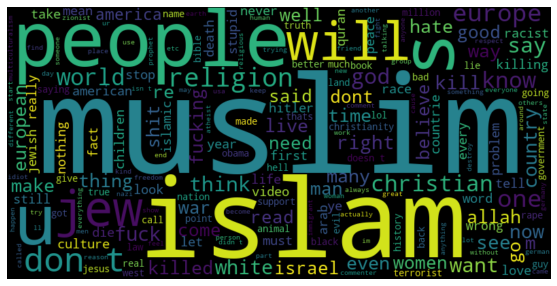

In [26]:
#unprocessed text word cloud --> non-toxic

word_cloud_label('text',0,'black')

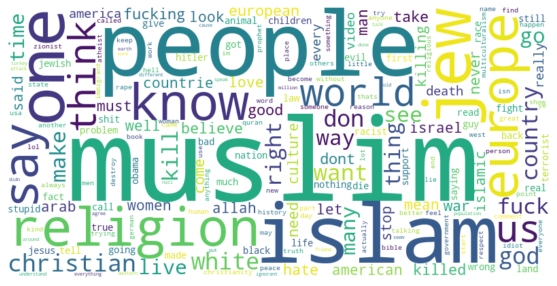

In [27]:
#processed word-token word cloud--> non-toxic

word_cloud_label('word_tokens',0,'white')

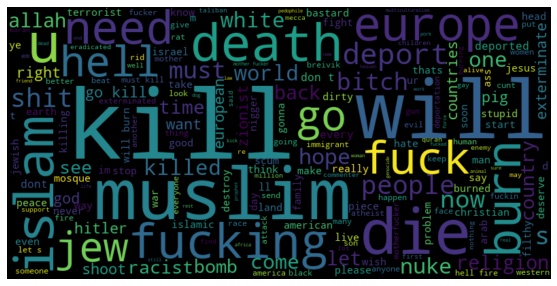

In [28]:
#unprocessed text word cloud ==> toxi

word_cloud_label('text',1,'black')

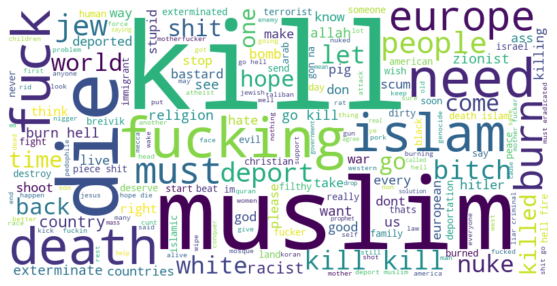

In [29]:
#processed word-token word cloud--> toxic

word_cloud_label('word_tokens',1,'white')

In [60]:
def data_info(df_):
    print(df_.info(),'\n',"="*50,'\n')
    print("shape",df_.shape,'\n',"="*50,'\n')
    print("size",df_.size,'\n',"="*50,'\n')
    print("columns",df.columns,'\n',"="*50,'\n')
    print("null_values",df.isnull().sum(),'\n',"="*50,'\n')

In [61]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28643 entries, 0 to 28642
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                28643 non-null  object
 1   label               28643 non-null  int64 
 2   word_count          28643 non-null  int64 
 3   char_count          28643 non-null  int64 
 4   special_char_count  28643 non-null  int64 
 5   numerics_count      28643 non-null  int64 
 6   upper_count         28643 non-null  int64 
 7   lower_count         28643 non-null  int64 
 8   stopwords_count     28643 non-null  int64 
 9   unique_words_count  28643 non-null  int64 
 10  sent_token          28643 non-null  object
 11  word_english_aplha  28643 non-null  object
 12  cleaned_v_1         28549 non-null  object
 13  word_tokens         28643 non-null  object
 14  word_tokens_a       28643 non-null  object
 15  word_tokens_verb    28643 non-null  object
 16  word_tokens_noun    28

### work from here

In [32]:
"""
column_description: 

1. cleaned_v_1 --> cleaned text in string type
2. word tokens --> list of words
3. word_tokens_v --> list of lemma words in verb
4. word_tokens_n --> list of lemma words in noun
"""

'\ncolumn_description: \n\n1. cleaned_v_1 --> cleaned text in string type\n2. word tokens --> list of words\n3. word_tokens_v --> list of lemma words in verb\n4. word_tokens_n --> list of lemma words in noun\n'

In [43]:
df['cleaned_v_1'] = df['cleaned_v_1'].fillna('') #handling the value error for np.NaN values in the text

In [44]:
## now we need to apply the vectorization techniques

#Bag of words 
#TF-IDF

In [47]:
# Apply bag of words to the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df['cleaned_v_1']).toarray()


In [48]:
cv.get_feature_names_out()

array(['aaaaaaah', 'aaaand', 'aabortion', ..., 'zyklon', 'zypernfrage',
       'zzz'], dtype=object)

In [49]:
feature_names = cv.get_feature_names_out()
pd.DataFrame(bag_of_words, columns = feature_names)

,aaaaaaah,aaaand,aabortion,aacademic,aah,aallah,aan,aanalong,aand,aandraag,...,zulus,zum,zusammenleben,zustnde,zwaar,zweig,zwishen,zyklon,zypernfrage,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## adding danilo model

### 3. Model Building Mock

In [50]:
## we need to update this ernie

dataset_mock = df[['text', 'label']].copy()

dataset_mock.head()

,text,label
0,it s because europeans do not want to change t...,0
1,the muslims there do not want to assimilate pr...,0
2,but it s ok because europe will soon rebel ...,1
3,i forsee a big civil war in europe in the futu...,0
4,islam a simple humanitarian and attractive r...,0


 ### 3.1 Data Cleaning and Preprocessing

In [51]:
## Check Duplicate Values
import pprint

pprint.pprint(dataset_mock[dataset_mock.duplicated()])

## Remove Duplicate Values
dataset_mock.drop_duplicates(inplace=True)


                                                    text  label
29     islam  a simple  humanitarian and attractive r...      0
30                                    welcome to islam        0
31                            and please read the quran       0
32     islam had the power of peacefully conquering s...      0
33     in contrast to christianity which has been und...      0
...                                                  ...    ...
28305                                  death to zionism       1
28312                                 may jesus help us       0
28354  denne kommentaren har fått for mange negative ...      0
28597                                      kill them all      1
28616                                     kill them all       1

[459 rows x 2 columns]


In [52]:
pprint.pprint(dataset_mock[dataset_mock.duplicated()])

Empty DataFrame
Columns: [text, label]
Index: []


## added danilo's comment present in that notebook

For now, I will create a function to clean the data text, and then I will use it to train the model. Although this should ideally be done in separate steps, I will proceed with both tasks in a single step for now.

I won't be using any stemming just lemmatization for now.

In [53]:

# Move this libarries to
import pandas as pd
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

In [54]:
dataset_mock['cleaned_text'] = df['text'].apply(clean_text)

In [55]:
dataset_mock.tail()

,text,label,cleaned_text
28638,yeah we are all monsters i m gonna kill u rig...,1,yeah we are all monsters i m gonna kill u rig...
28639,stupid brainwashed idiot,0,stupid brainwashed idiot
28640,have you ever been to serbia or kosovo fucki...,0,have you ever been to serbia or kosovo fucki...
28641,probably u mean to this monsters fucker watch...,0,probably u mean to this monsters fucker watch...
28642,the fucking funniest thing is that fucking ame...,0,the fucking funniest thing is that fucking ame...


### Experiment 1:Lemmatization and POS tagging

- stemming - > NO
- Lowercasing -> Yes
- Removing special characters -> Yes
- Tokenization-> Yes


In [56]:
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer:
    def __init__(self):
        self.download_assets()
        self.wnl = WordNetLemmatizer()
        self.stopwords = set(stopwords.words("english"))

    @classmethod
    def download_assets(cls)->None:
        """
        Download the necessary assets for the tokenizer

        :return: None
        """
        nltk.download("stopwords", quiet=True)
        nltk.download("wordnet", quiet=True)
        nltk.download("punkt", quiet=True)
        nltk.download("omw-1.4", quiet=True)
        nltk.download("averaged_perceptron_tagger", quiet=True)

    def __call__(self, doc):
        """
        Tokenize and lemmatize the document

        :param doc: The document to tokenize and lemmatize

        :return: The tokenized and lemmatized document
        """
        nltk_tagged = pos_tag(word_tokenize(doc))
        wordnet_tagged = ((x[0], self.nltk_pos_tagger(x[1])) for x in nltk_tagged)

        return [
            self.wnl.lemmatize(token, tag)
            for token, tag in wordnet_tagged
            if token not in self.stopwords and any(c.isalpha() for c in token)
        ]

    def nltk_pos_tagger(self, nltk_tag):
        """
        Convert the nltk tag to wordnet tag

        :param nltk_tag: The nltk tag

        :return: The wordnet tag
        """
        if nltk_tag.startswith("J"):
            return wordnet.ADJ
        elif nltk_tag.startswith("V"):
            return wordnet.VERB
        elif nltk_tag.startswith("N"):
            return wordnet.NOUN
        elif nltk_tag.startswith("R"):
            return wordnet.ADV
        else:
            return wordnet.NOUN

#### Split the data into train and test

In [57]:
#Move to the top
from sklearn.model_selection import train_test_split

def split_data(df, test_size):
    """
    Split the data into training and testing

    :param df: The dataframe to split
    :param test_size: The size of the testing data

    :return: The training and testing data
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame")

    if not isinstance(test_size, float):
        raise ValueError("test_size must be a float")
    
    if test_size <= 0 or test_size >= 1:
        raise ValueError("test_size must be a float between 0 and 1")
    
    # Check in the columns are present
    if "text" not in df.columns or "label" not in df.columns:
        raise ValueError("df must have a 'text' and 'label' column")
    else:
        x_raw, y = df["text"], df["label"]
        x_train, x_test, y_train, y_test = train_test_split(
            x_raw.values, y.values, test_size=test_size, stratify=y, random_state=0
        )
        x_train, x_test = x_train.flatten(), x_test.flatten()
        return x_train, x_test, y_train, y_test
    


In [58]:
test_size = 0.1
x_train, x_test, y_train, y_test = split_data(dataset_mock, test_size)

#### Vectorization and Tokenization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    tokenizer=LemmaTokenizer(),
    strip_accents="unicode", # Remove accents and perform other character normalization
    ngram_range=(1, 2), # Use unigrams and bigrams
    min_df=0.0005, # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.8, # Ignore terms that have a document frequency strictly higher than the given threshold
)

#### Model Naive Bayes

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = MultinomialNB()

pipeline = Pipeline([("vectorizer", vectorizer), ("clf", clf)])

print("Model training")
pipeline.fit(x_train, y_train)

print("Model evaluation")
pipeline.score(x_test, y_test)
y_pred_test = pipeline.predict(x_test)

f1 = f1_score(y_test, y_pred_test, average="macro")
print(balanced_accuracy_score(y_test, y_pred_test))
accuracy_score(y_test, y_pred_test)

num_features_basic = vectorizer.transform(x_test).shape[1]

Model training
Model evaluation
0.6795931563831394


In [61]:
## Plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test, labels=[0, 1])

array([[2641,   45],
       [  83,   50]], dtype=int64)

In [62]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Number of features: 2266
Accuracy: 0.9545938275984391
F1 Score: 0.7074683010669002


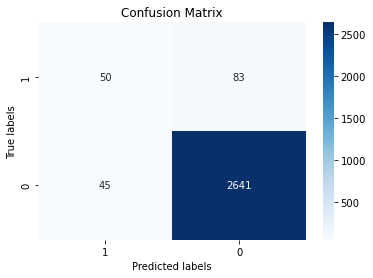

In [64]:
print(f"Number of features: {num_features_basic}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"F1 Score: {f1}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot the confusion matrix

    :param y_true: The true labels
    :param y_pred: The predicted labels
    :param labels: The labels to use
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

plot_confusion_matrix(y_test, y_pred_test, [1, 0])

In [65]:
### Model Evaluation

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2686
           1       0.53      0.38      0.44       133

    accuracy                           0.95      2819
   macro avg       0.75      0.68      0.71      2819
weighted avg       0.95      0.95      0.95      2819



## Model Testing

In [66]:
## Save the model

import joblib

joblib.dump(pipeline, "model.pkl")

## Load the model

model = joblib.load("model.pkl")

model.score(x_test, y_test)

## Predict

0.9545938275984391

In [67]:
!pip install googledrivedownloader

In [68]:
### Python Code to dowload file from google drive

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1URSwK6HKKbD2LLokDZI4xhzSj07ShkXm', dest_path='./test_youtube.csv')


In [69]:
you_tube_data = pd.read_csv('test_youtube.csv')

you_tube_data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
## Select the text column and IsToxic column True

you_tube_data = you_tube_data[["Text", "IsToxic"]]
you_tube_data.head()

#Create New Column Wiit prediction 

you_tube_data["Predicted"] = model.predict(you_tube_data["Text"])



In [71]:
you_tube_data.head()

,Text,IsToxic,Predicted
0,If only people would just take a step back and...,False,0
1,Law enforcement is not trained to shoot to app...,True,1
2,\nDont you reckon them 'black lives matter' ba...,True,0
3,There are a very large number of people who do...,False,0
4,"The Arab dude is absolutely right, he should h...",False,1
